# Basic image processing with Python

In [22]:
%matplotlib notebook
import numpy as np
import matplotlib.pyplot as plt

#import cv2 # OPENCV
from scipy import ndimage
from PIL import Image
import os

In [17]:
os.listdir("./")

['superalloy.jpg', '.ipynb_checkpoints', 'image_processing.ipynb']

In [8]:
im = Image.open("superalloy.jpg")
im

In [11]:
im = np.array(im) # conversion to numpy
im.shape

(234, 334, 3)

In [20]:
im = im[:,:,0] # We keep only the red channel because they are all identical here

<IPython.core.display.Javascript object>


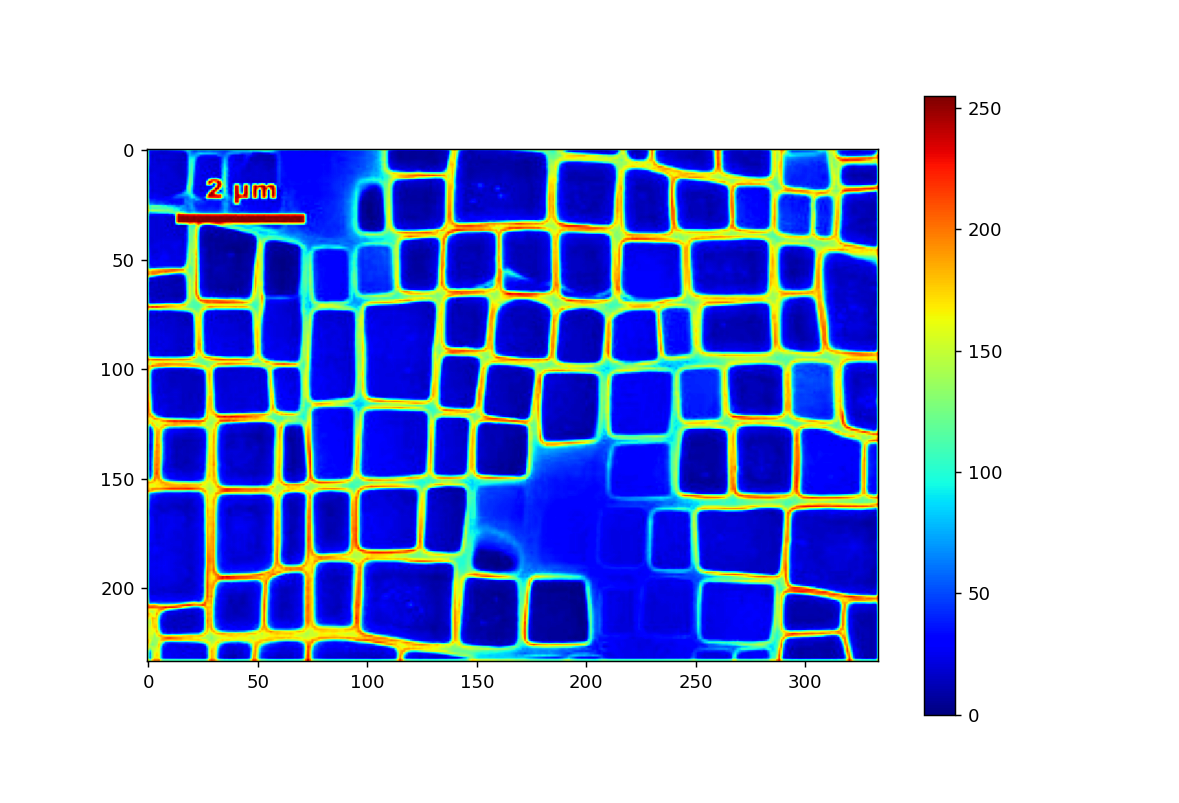

In [24]:
import matplotlib as mpl

fig = plt.figure()
plt.imshow(im, cmap = mpl.cm.jet)
plt.colorbar()
plt.show()

## Histogram and thresholding

<IPython.core.display.Javascript object>


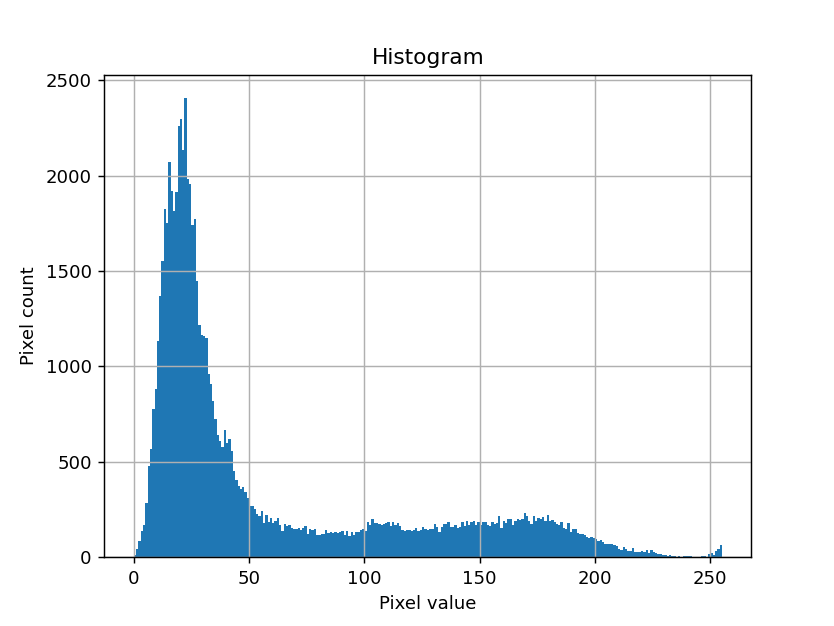

In [31]:
fig = plt.figure()
#ax = fig.add_subplot(1,2,1)
plt.hist(im.flatten(), bins = np.arange(256))
plt.xlabel("Pixel value")
plt.ylabel("Pixel count")
plt.grid()
plt.title("Histogram")
plt.show()

<IPython.core.display.Javascript object>


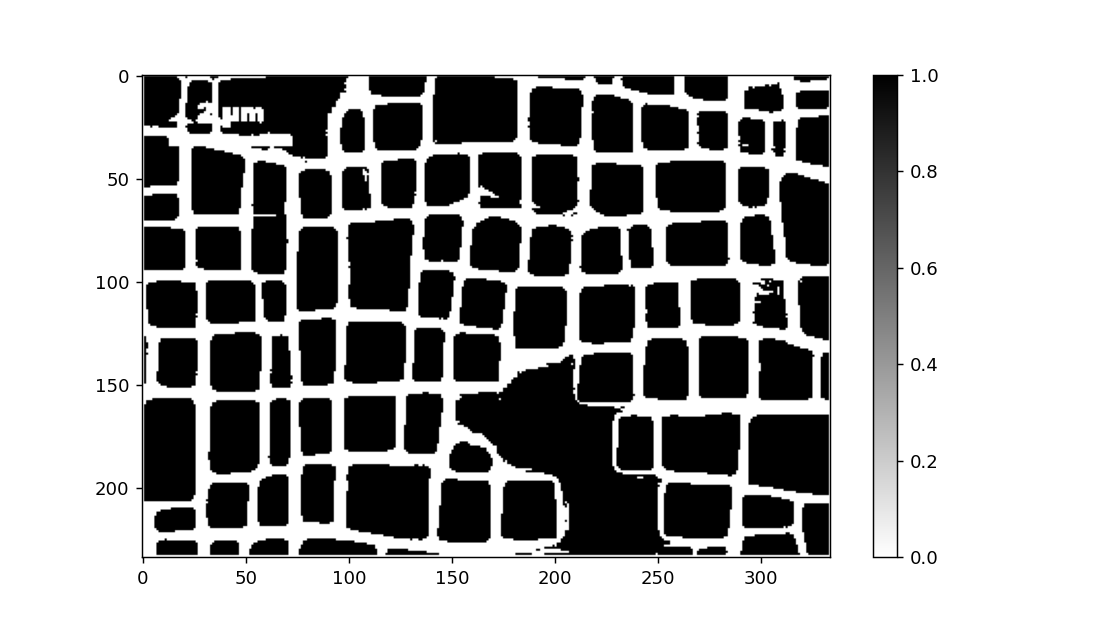

interactive(children=(FloatSlider(value=50.0, description='threshold', max=255.0, step=1.0), Output()), _dom_c…

In [39]:
import ipywidgets as ipw

imt = (im <= 50.)*1.
fig = plt.figure()
show = plt.imshow(imt, cmap = mpl.cm.binary)

@ipw.interact(threshold = (0., 255., 1) )
def update(threshold = 50.):
    imt = (im <= threshold)*1.
    show.set_array(imt)

plt.colorbar()
plt.show()

In [51]:
iml, labels = ndimage.measurements.label(imt)
print(labels)
iml

110


array([[ 0,  0,  0, ...,  0,  0,  0],
       [ 0,  1,  1, ..., 11, 11,  0],
       [ 0,  1,  1, ..., 11,  0,  0],
       ...,
       [ 0,  0,  0, ..., 99, 99,  0],
       [ 0,  0,  0, ..., 99, 99,  0],
       [ 0,  0,  0, ...,  0,  0,  0]], dtype=int32)

<IPython.core.display.Javascript object>


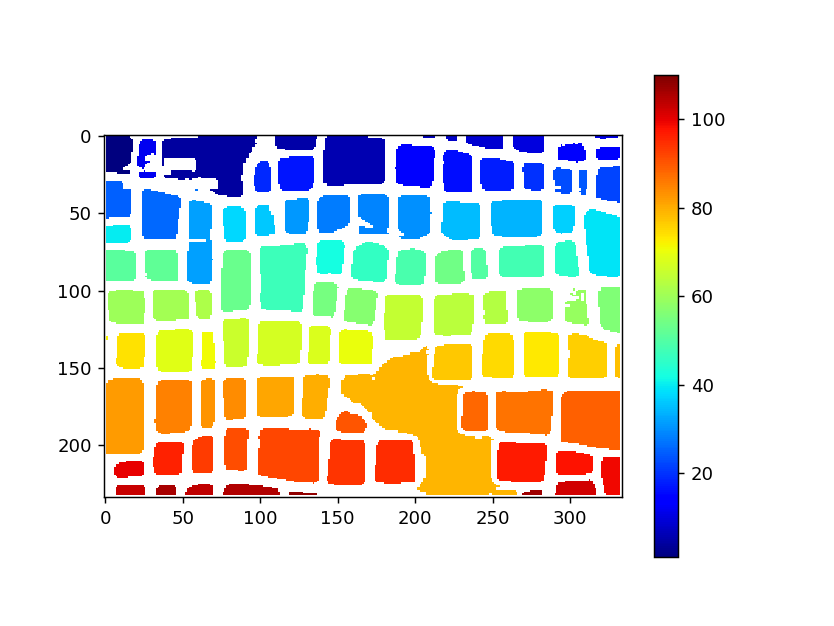

In [50]:
fig = plt.figure()
plt.imshow(np.where(iml == 0, np.nan, iml), cmap = mpl.cm.jet)
plt.colorbar()
plt.show()

In [47]:
np.where(iml == 0, np.nan, iml)

array([[nan, nan, nan, ..., nan, nan, nan],
       [nan,  1.,  1., ..., 11., 11., nan],
       [nan,  1.,  1., ..., 11., nan, nan],
       ...,
       [nan, nan, nan, ..., 99., 99., nan],
       [nan, nan, nan, ..., 99., 99., nan],
       [nan, nan, nan, ..., nan, nan, nan]])

## Image statistics



In [73]:
import pandas as pd
stats = {"area":[], # ZONE AREA 
         "xpos":[], # CENTER OF GRAVITY POSITION ON X
         "ypos":[], # CENTER OF GRAVITY POSITION ON Y 
        }

for label in range(1, labels):
    area = (iml == label).sum()
    xg, yg = np.where(iml == label)
    xpos = xg.mean()
    ypos = yg.mean()
    stats["area"].append(area)
    stats["xpos"].append(xpos)
    stats["ypos"].append(ypos)

stats = pd.DataFrame(stats, index = range(1, labels))
stats.sort_values("area", ascending = False).head(10)

area        xpos        ypos
79  4713  186.806493  207.563548
4   1646   16.479344   68.942284
89  1425  183.007719  313.622456
92  1358  206.058910  119.166421
6   1298   16.863636  160.835131
47  1286   91.678849  115.053655
82  1236  181.616505   12.977346
87  1047  178.659026  270.773639
39   943   69.898197  321.127253
32   864   69.853009   61.232639

## New image with stats

In [81]:
stats["area"]

1       412
2         1
3         5
4      1646
5       262
       ... 
105     256
106      94
107      51
108      55
109       2
Name: area, Length: 109, dtype: int64

In [82]:
stats.head()

area       xpos        ypos
1   412  12.407767    9.000000
2     1   1.000000   21.000000
3     5   1.200000   34.400000
4  1646  16.479344   68.942284
5   262   5.286260  123.354962

In [86]:
stats.loc[3] # Row by index in the dataframe

area     5.0
xpos     1.2
ypos    34.4
Name: 3, dtype: float64

In [84]:
stats.iloc[3] # Row by position in the dataframe (not the same as .loc)

area    1646.000000
xpos      16.479344
ypos      68.942284
Name: 4, dtype: float64

<IPython.core.display.Javascript object>


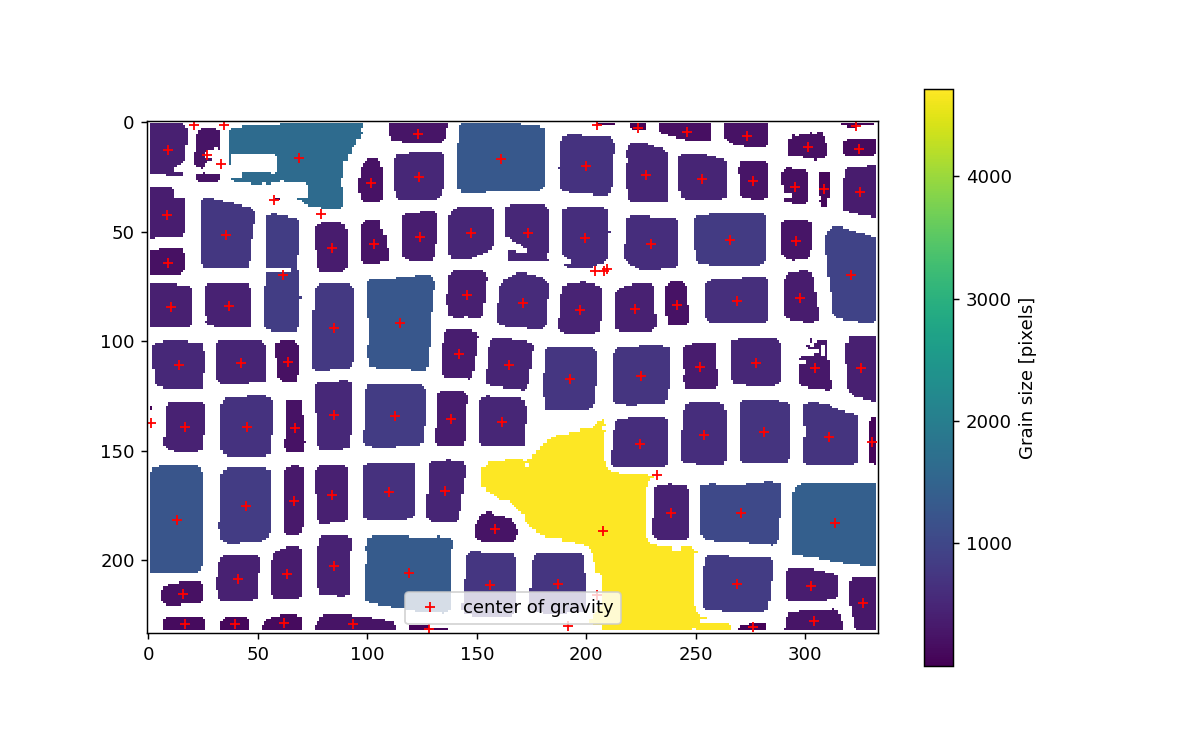

In [91]:
ims = np.zeros_like(iml) * np.nan
for label in range(1, labels):
    ims[iml == label] = stats.loc[label].area
    
plt.figure()
plt.imshow(ims)
plt.plot(stats.ypos, stats.xpos, "+r", label = "center of gravity")
cbar = plt.colorbar()
cbar.set_label("Grain size [pixels]")
plt.legend(loc = "best")
plt.savefig("image.pdf")

## Examples  / Questions

In [60]:
a = np.random.randint(4, size = (6,6))
a

array([[3, 2, 3, 1, 0, 2],
       [3, 2, 0, 3, 3, 2],
       [1, 2, 1, 0, 1, 3],
       [0, 2, 2, 0, 1, 3],
       [2, 2, 2, 1, 0, 3],
       [3, 3, 2, 2, 1, 1]])

In [62]:
xg, yg = np.where(a == 3)

(array([0, 0, 1, 1, 1, 2, 3, 4, 5, 5]), array([0, 2, 0, 3, 4, 5, 5, 5, 0, 1]))